In [5]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import os  # For interacting with the operating system

# Define the current directory path
current_dir = os.getcwd()

# Using os.listdir to list all files in the current directory
files_in_dir = os.listdir(current_dir)

# Iterate through each file in the current directory and print its name
for filename in files_in_dir:
    # Print the name of each file in the current directory
    print(filename)

# This code will print the names of all files in the current directory


.ipynb_checkpoints
2345065.ipynb
LinkedInJobs_MLDataset Data Dictionary.txt
LinkedInJobs_MLDataset.csv


# **LinkedInJobs_MLDataset Data Dictionary**

# **PREDICTION 1: SPONSERSHIP IN JOBS**
# **PREDICTION 2: SALARY PREDICTION**

# **IMPORTING THE LIBRARIES AND LAODING THE DATASET**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv('LinkedInJobs_MLDataset.csv')

In [8]:
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


**LinkedInJobs_MLDataset Data Dictionary**

- Co_Nm / Company Name, dType Object
- Co_Pg_Lstd / Company Page Listed, dType Bool
- Emp_Cnt / Company Employee Count, dType int64
- Flw_Cnt / Company Follower Count, dType int64
- Job_Ttl / Job Title, dType Object
- Job_Desc / Job Description, dtype Object
- Is_Supvsr / Is Post a Supervisor Position (Calculated), dType Bool
- max_sal / Maximum Salary, dtype Float64
- med_sal / Median Salary, dtype Float64
- min_sal / Minimum Salary, dtype Float64
- py_prd / Pay Period, dtype Category {Not Listed, YEARLY, HOURLY, MONTHLY, Unpaid, WEEKLY, ONCE}
- py_lstd / Pay Listed (Calculated), dtype Bool 
- wrk_typ / Work Type, dtype Category {Full-time, Contract, Part-time, Temporary, Internship, Other, Volunteer}
- loc / Job Location, dtype Object
- st_code / Job State Code (Calculated), dtype Object
- is_remote / Is Job Remote (Calculated), dtype Bool
- views / Number of Posting Views, dtype int64
- app_typ / Application Type, dtype Category {Offsite Apply, SimpleOnSiteApply, ComplexOnSiteApply}
- app_is_off / Is Application Offsite (Calculated), dtype Bool
- xp_lvl / Experience Level, dtype Category {Mid-Senior level, Not Listed, Entry level, Associate, Director, Internship, Executive}
- domain / Posting Domain, dtype Object
- has_post_domain / Has Posting Domain (Calculated), dtype Bool
- is_sponsored / Is Sponsored, dtype Bool
- base_comp / Has Base Compensation, dtype Bool


# **EDA**

**Rename all the column names for clarity**

In [9]:
# Define new column names
new_column_names = {
    'Co_Nm': 'Company_Name',
    'Co_Pg_Lstd': 'Company_Page_Listed',
    'Emp_Cnt': 'Employee_Count',
    'Flw_Cnt': 'Followers_Count',
    'Job_Ttl': 'Job_Title',
    'Job_Desc': 'Job_Description',
    'Is_Supvsr': 'Is_Supervisor',
    'max_sal': 'Max_Salary',
    'med_sal': 'Median_Salary',
    'min_sal': 'Min_Salary',
    'py_prd': 'Posting_Period',
    'py_lstd': 'Posting_Listed',
    'wrk_typ': 'Work_Type',
    'loc': 'Location',
    'st_code': 'State_Code',
    'is_remote': 'Is_Remote',
    'views': 'Views',
    'app_typ': 'Application_Type',
    'app_is_off': 'Application_Is_Offsite',
    'xp_lvl': 'Experience_Level',
    'domain': 'Domain',
    'has_post_domain': 'Has_Posting_Domain',
    'is_sponsored': 'Is_Sponsored',
    'base_comp': 'Base_Compensation'
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

# Check the updated column names
print(df.columns)


Index(['Company_Name', 'Company_Page_Listed', 'Employee_Count',
       'Followers_Count', 'Job_Title', 'Job_Description', 'Is_Supervisor',
       'Max_Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period',
       'Posting_Listed', 'Work_Type', 'Location', 'State_Code', 'Is_Remote',
       'Views', 'Application_Type', 'Application_Is_Offsite',
       'Experience_Level', 'Domain', 'Has_Posting_Domain', 'Is_Sponsored',
       'Base_Compensation'],
      dtype='object')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Followers_Count         33246 non-null  int64  
 4   Job_Title               33246 non-null  object 
 5   Job_Description         33244 non-null  object 
 6   Is_Supervisor           33246 non-null  bool   
 7   Max_Salary              33246 non-null  float64
 8   Median_Salary           33246 non-null  float64
 9   Min_Salary              33246 non-null  float64
 10  Posting_Period          33246 non-null  object 
 11  Posting_Listed          33246 non-null  bool   
 12  Work_Type               33246 non-null  object 
 13  Location                33246 non-null  object 
 14  State_Code              33246 non-null

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Employee_Count,33246.0,15484.558744,6.218095e+04,0.0,148.00,1235.0,8160.0000,829111.0
Followers_Count,33246.0,523436.391055,2.708736e+06,0.0,8135.75,37996.5,168036.0000,31887198.0
Max_Salary,33246.0,31866.146792,6.823853e+04,0.0,0.00,0.0,97.9675,1300000.0
Median_Salary,33246.0,27494.954904,5.790564e+04,0.0,0.00,0.0,90.0000,1050000.0
Min_Salary,33246.0,23123.763015,4.897738e+04,0.0,0.00,0.0,84.7850,998426.0
Is_Remote,33246.0,0.144438,3.515390e-01,0.0,0.00,0.0,0.0000,1.0
Views,33246.0,45.424592,1.269727e+02,0.0,1.00,7.0,38.0000,5656.0
Is_Sponsored,33246.0,0.244150,4.295884e-01,0.0,0.00,0.0,0.0000,1.0
Base_Compensation,33246.0,0.401612,4.902317e-01,0.0,0.00,0.0,1.0000,1.0


In [12]:
#check the NA counts
df.isna().sum()

Company_Name                  4
Company_Page_Listed           0
Employee_Count                0
Followers_Count               0
Job_Title                     0
Job_Description               2
Is_Supervisor                 0
Max_Salary                    0
Median_Salary                 0
Min_Salary                    0
Posting_Period                0
Posting_Listed                0
Work_Type                     0
Location                      0
State_Code                    0
Is_Remote                     0
Views                         0
Application_Type              0
Application_Is_Offsite        0
Experience_Level              0
Domain                    13558
Has_Posting_Domain            0
Is_Sponsored                  0
Base_Compensation             0
dtype: int64

In [13]:
df.shape

(33246, 24)

In [14]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()

Employee_Count       3829
Followers_Count      9119
Is_Remote               2
Views                 789
Is_Sponsored            2
Base_Compensation       2
dtype: int64

In [15]:
#Checking the number of unique values
df.select_dtypes(include='float64').nunique()

Max_Salary       2709
Median_Salary    3186
Min_Salary       2457
dtype: int64

In [16]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

Company_Name        11267
Job_Title           22290
Job_Description     30139
Posting_Period          7
Work_Type               7
Location             4621
State_Code             53
Application_Type        3
Experience_Level        7
Domain               2576
dtype: int64

In [17]:
#Checking the number of unique values
df.select_dtypes(include='bool').nunique()

Company_Page_Listed       2
Is_Supervisor             2
Posting_Listed            2
Application_Is_Offsite    2
Has_Posting_Domain        2
dtype: int64

# **RECATEGORIZING THE JOB_TITLE VARIBALE**

In [18]:
#job title has many unique values; lets visualize them
df.Job_Title.unique()

array(['Hearing Care Provider',
       'Shipping & Receiving Associate 2nd shift (Beaver Dam)',
       'Manager, Engineering', ..., 'Senior Auditor - Financial Services',
       'Travel Registered Nurse OR Operating Room - 680168',
       'Travel Surgical Tech - 680145'], dtype=object)

In [19]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_Job_Title'] = df['Job_Title'].apply(categorize_job_title)

# Check the unique values in the new column
print(df['Categorized_Job_Title'].unique())


['Other' 'Engineering' 'Architect' 'Management' 'Technician'
 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist' 'Developer'
 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [20]:
# Print the count values of all categories
category_counts = df['Categorized_Job_Title'].value_counts()
print(category_counts)


Categorized_Job_Title
Other             12439
Management         5116
Engineering        3262
Specialist         1740
Analyst            1528
Technician         1265
Assistant          1158
Sales              1140
Nursing            1122
Coordinator         732
Representative      727
Developer           688
Supervisor          521
Consultant          478
Architect           387
Designer            314
Administrator       299
Research            171
Technologist        159
Name: count, dtype: int64


In [21]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_Job_Title'] = df['Job_Title'].apply(categorize_job_title)

# Check the unique values in the new column
print(df['Categorized_Job_Title'].unique())


['Reduced_Other' 'Other' 'Engineering' 'Architect' 'Management'
 'Technician' 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist'
 'Developer' 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [22]:
# Print the count values of all categories
category_counts = df['Categorized_Job_Title'].value_counts()
print(category_counts)

Categorized_Job_Title
Reduced_Other     6487
Other             5952
Management        5116
Engineering       3262
Specialist        1740
Analyst           1528
Technician        1265
Assistant         1158
Sales             1140
Nursing           1122
Coordinator        732
Representative     727
Developer          688
Supervisor         521
Consultant         478
Architect          387
Designer           314
Administrator      299
Research           171
Technologist       159
Name: count, dtype: int64


In [23]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract and count words in job titles
def count_words_in_category(category):
    words = ' '.join(df[df['Categorized_Job_Title'] == category]['Job_Title']).lower().split()
    word_counts = Counter(words)
    return word_counts

# Get word counts for "Other" category
other_word_counts = count_words_in_category('Other')
print("Word counts in 'Other' category:")
print(other_word_counts.most_common(50))  # Adjust the number as needed

print("\n-----------------------------\n")

# Get word counts for "Reduced_Other" category
reduced_other_word_counts = count_words_in_category('Reduced_Other')
print("Word counts in 'Reduced_Other' category:")
print(reduced_other_word_counts.most_common(50))  # Adjust the number as needed

Word counts in 'Other' category:
[('-', 3092), ('associate', 522), ('director', 480), ('of', 466), ('&', 372), ('senior', 347), ('and', 340), ('in', 273), ('time', 245), ('shift', 237), ('lead', 230), ('rn', 230), ('director,', 207), ('tech', 194), ('business', 172), ('service', 160), ('operations', 159), ('driver', 150), ('tax', 149), ('support', 146), ('job', 146), ('make', 146), ('to', 143), ('health', 142), ('/', 140), ('remote', 139), ('care', 136), ('travel', 133), ('executive', 133), ('part', 131), ('team', 130), ('operator', 130), ('management', 128), ('intern', 128), ('services', 127), ('staff', 127), ('development', 123), ('center', 117), ('2024', 116), ('account', 115), ('data', 113), ('i', 113), ('full', 112), ('advisor', 111), ('professional', 100), ('medical', 94), ('vice', 93), ('|', 93), ('ii', 89), ('customer', 89)]

-----------------------------

Word counts in 'Reduced_Other' category:
[('associate', 438), ('accountant', 371), ('senior', 324), ('director', 304), ('ex

In [24]:
# Define a function to recategorize job titles
def recategorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    elif 'receptionist' in title_lower:
        return 'Other' if 'analyst' in title_lower else 'Assistant'
    elif 'customer service' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Sales'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'accountant' in title_lower:
        return 'Reduced_Other' if 'senior' in title_lower else 'Accounting'
    elif 'senior' in title_lower:
        return 'Other' if 'director' in title_lower else 'Senior'
    elif 'director' in title_lower:
        return 'Other' if 'executive' in title_lower else 'Director'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'lead' in title_lower:
        return 'Reduced_Other' if 'rn' in title_lower else 'Lead'
    elif 'rn' in title_lower:
        return 'Reduced_Other' if 'operator' in title_lower else 'Nursing'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'attorney' in title_lower:
        return 'Reduced_Other' if 'account' in title_lower else 'Legal'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Accounting'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'of' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Other'
    elif 'tech' in title_lower:
        return 'Other' if 'director' in title_lower else 'Technical'
    elif 'business' in title_lower:
        return 'Other' if 'director' in title_lower else 'Business'
    elif 'service' in title_lower:
        return 'Other' if 'director' in title_lower else 'Service'
    elif 'operations' in title_lower:
        return 'Other' if 'director' in title_lower else 'Operations'
    elif 'driver' in title_lower:
        return 'Other' if 'director' in title_lower else 'Driver'
    elif 'tax' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Tax'
    elif 'support' in title_lower:
        return 'Other' if 'director' in title_lower else 'Support'
    elif 'job' in title_lower:
        return 'Other' if 'director' in title_lower else 'Job'
    elif 'make' in title_lower:
        return 'Other' if 'director' in title_lower else 'Make'
    elif 'to' in title_lower:
        return 'Other' if 'director' in title_lower else 'To'
    elif 'health' in title_lower:
        return 'Other' if 'director' in title_lower else 'Health'
    elif '/' in title_lower:
        return 'Other' if 'director' in title_lower else 'Slash'
    elif 'remote' in title_lower:
        return 'Other' if 'director' in title_lower else 'Remote'
    elif 'care' in title_lower:
        return 'Other' if 'director' in title_lower else 'Care'
    elif 'travel' in title_lower:
        return 'Other' if 'director' in title_lower else 'Travel'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'part' in title_lower:
        return 'Other' if 'director' in title_lower else 'Part'
    elif 'team' in title_lower:
        return 'Other' if 'director' in title_lower else 'Team'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'management' in title_lower:
        return 'Other' if 'director' in title_lower else 'Management'
    elif 'intern' in title_lower:
        return 'Other' if 'director' in title_lower else 'Intern'
    elif 'services' in title_lower:
        return 'Other' if 'director' in title_lower else 'Services'
    elif 'staff' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Staff'
    elif 'development' in title_lower:
        return 'Other' if 'director' in title_lower else 'Development'
    elif 'center' in title_lower:
        return 'Other' if 'director' in title_lower else 'Center'
    elif '2024' in title_lower:
        return 'Other' if 'director' in title_lower else '2024'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Account'
    elif 'data' in title_lower:
        return 'Other' if 'director' in title_lower else 'Data'
    elif 'i' in title_lower:
        return 'Other' if 'director' in title_lower else 'I'
    elif 'full' in title_lower:
        return 'Other' if 'director' in title_lower else 'Full'
    elif 'advisor' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Advisor'
    elif 'professional' in title_lower:
        return 'Other' if 'director' in title_lower else 'Professional'
    elif 'medical' in title_lower:
        return 'Other' if 'director' in title_lower else 'Medical'
    elif 'vice' in title_lower:
        return 'Other' if 'director' in title_lower else 'Vice'
    elif '|' in title_lower:
        return 'Other' if 'director' in title_lower else 'Pipe'
    elif 'ii' in title_lower:
        return 'Other' if 'director' in title_lower else 'II'
    elif 'customer' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Customer'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with recategorized job titles
df['Recategorized_Job_Title'] = df['Job_Title'].apply(recategorize_job_title)

# Check the unique values in the new column
print(df['Recategorized_Job_Title'].unique())


['Care' 'Sales' 'Engineering' 'Reduced_Other' 'Architect' 'Management'
 'Director' 'Technician' 'Technical' 'I' 'Representative' 'Designer'
 'Analyst' 'Nursing' 'Remote' 'Other' 'To' 'Specialist' 'Developer'
 'Supervisor' 'Coordinator' 'Driver' 'Lead' 'Slash' 'Operator' 'Assistant'
 'Staff' 'Consultant' 'Part' 'Senior' 'Administrator' 'Research' 'Support'
 'Accounting' 'Tax' 'Technologist' 'Health' '2024' 'Service' 'Executive'
 'Center' 'Team' 'Data' 'Operations' 'Business' 'Development' 'Job'
 'Travel' 'Pipe' 'Make' 'Full']


['Healthcare' 'Sales' 'Engineering' 'Other' 'Management' 'Technical'
 'Creative' 'Analyst' 'Specialist' 'Assistant' 'Financial']
Grouped_Category
Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: count, dtype: int64


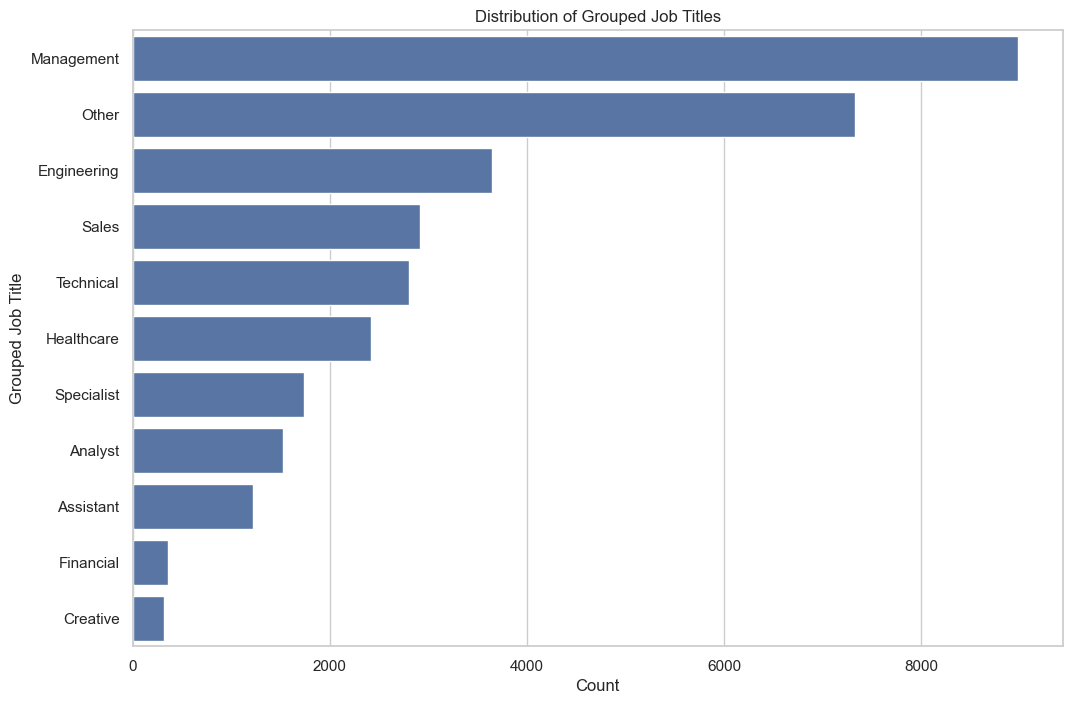

In [25]:
# Define a mapping for grouping categories
category_mapping = {
    'Management': 'Management',
    'Engineering': 'Engineering',
    'I': 'Other',
    'Nursing': 'Healthcare',
    'Sales': 'Sales',
    'Specialist': 'Specialist',
    'Analyst': 'Analyst',
    'Technician': 'Technical',
    'Assistant': 'Assistant',
    'Reduced_Other': 'Other',
    'Director': 'Management',
    'To': 'Other',
    'Other': 'Other',
    'Coordinator': 'Management',
    'Representative': 'Sales',
    'Developer': 'Technical',
    'Supervisor': 'Management',
    'Lead': 'Management',
    'Consultant': 'Management',
    'Architect': 'Engineering',
    'Senior': 'Other',
    'Slash': 'Other',
    'Accounting': 'Financial',
    'Technical': 'Technical',
    'Designer': 'Creative',
    'Administrator': 'Management',
    'Operator': 'Technical',
    'Executive': 'Management',
    'Driver': 'Other',
    'Part': 'Other',
    'Research': 'Other',
    'Service': 'Other',
    'Technologist': 'Technical',
    'Health': 'Healthcare',
    'Support': 'Other',
    'Care': 'Healthcare',
    'Staff': 'Other',
    'Team': 'Management',
    'Business': 'Other',
    'Data': 'Technical',
    'Remote': 'Other',
    'Job': 'Other',
    'Operations': 'Management',
    'Travel': 'Other',
    'Center': 'Management',
    '2024': 'Other',
    'Tax': 'Financial',
    'Make': 'Other',
    'Development': 'Other',
    'Full': 'Other',
    'Pipe': 'Other'
}

# Map the categories using the defined mapping
df['Grouped_Category'] = df['Recategorized_Job_Title'].map(category_mapping)

# Check the unique values in the new column
print(df['Grouped_Category'].unique())

# Print the count values of grouped categories
grouped_category_counts = df['Grouped_Category'].value_counts()
print(grouped_category_counts)

# Set the plot style
sns.set(style="whitegrid")

# Plot a bar chart for the grouped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Grouped_Category', data=df, order=df['Grouped_Category'].value_counts().index)
plt.title('Distribution of Grouped Job Titles')
plt.xlabel('Count')
plt.ylabel('Grouped Job Title')
plt.show()


In [26]:
# Print the count values of all categories
category_counts_recategorized = df['Grouped_Category'].value_counts()
print(category_counts_recategorized)

Grouped_Category
Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: count, dtype: int64


# **RECATEGORIZING THE LOCATION VARIABLE**

In [27]:
#job title has many unique values; lets visualize them
df.Location.unique()

array(['Little River, SC', 'Beaver Dam, WI', 'Bessemer, AL', ...,
       'Brunswick, TN', 'South Boston, VA', 'Placerville, CA'],
      dtype=object)

In [28]:
# Define a function to categorize locations into broader regions based on state codes
def categorize_location(location):
    state_code = location.split(",")[-1].strip()  # Extract the state code

    # Define mappings of state codes to broader regions
    region_mapping = {
        'AL': 'South',
        'AK': 'West',
        'AZ': 'West',
        'AR': 'South',
        'CA': 'West',
        'CO': 'West',
        'CT': 'East',
        'DE': 'East',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'ID': 'West',
        'IL': 'Central',
        'IN': 'Central',
        'IA': 'Central',
        'KS': 'Central',
        'KY': 'South',
        'LA': 'South',
        'ME': 'North',
        'MD': 'East',
        'MA': 'East',
        'MI': 'Central',
        'MN': 'North',
        'MS': 'South',
        'MO': 'Central',
        'MT': 'West',
        'NE': 'Central',
        'NV': 'West',
        'NH': 'North',
        'NJ': 'East',
        'NM': 'West',
        'NY': 'East',
        'NC': 'South',
        'ND': 'North',
        'OH': 'Central',
        'OK': 'Central',
        'OR': 'West',
        'PA': 'East',
        'RI': 'East',
        'SC': 'South',
        'SD': 'North',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VT': 'North',
        'VA': 'East',
        'WA': 'West',
        'WV': 'South',
        'WI': 'Central',
        'WY': 'West',
    }

    # Use the mapping or assign to 'Other' if not found
    return region_mapping.get(state_code, 'Other')

# Apply the function to create a new column with categorized locations
df['Categorized_Location'] = df['Location'].apply(categorize_location)

# Check the unique values in the new column
print(df['Categorized_Location'].unique())


['South' 'Central' 'West' 'Other' 'East' 'North']


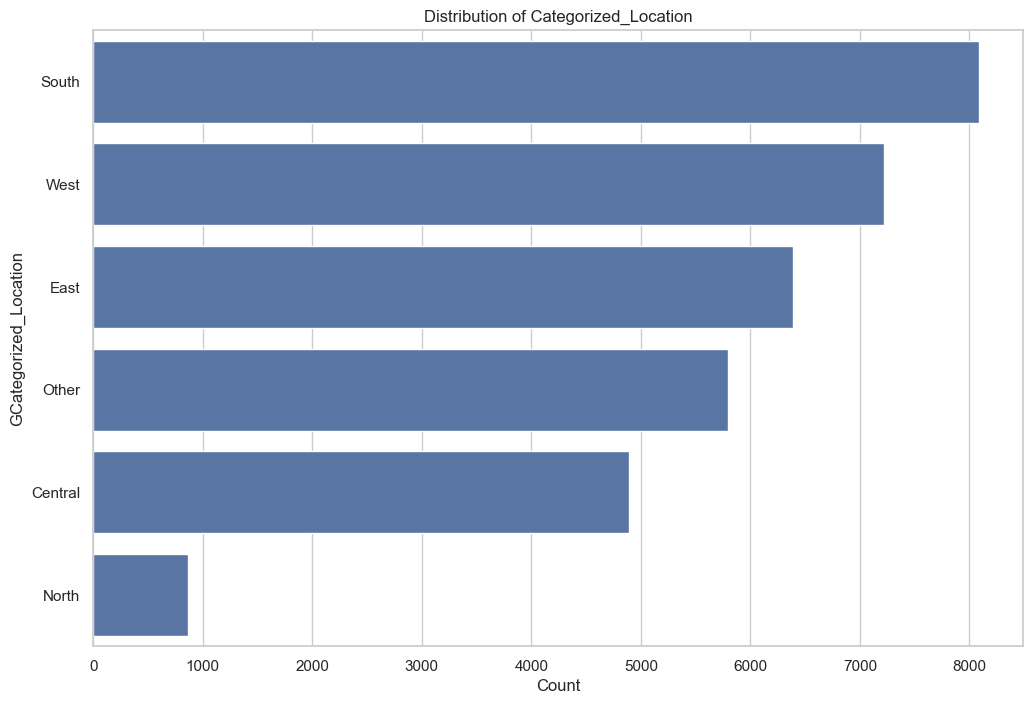

In [29]:
# Set the plot style
sns.set(style="whitegrid")

# Plot a bar chart for the grouped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Categorized_Location', data=df, order=df['Categorized_Location'].value_counts().index)
plt.title('Distribution of Categorized_Location')
plt.xlabel('Count')
plt.ylabel('GCategorized_Location')
plt.show()

In [30]:
# Drop specified columns
df.drop(['Job_Title','Job_Description','Categorized_Job_Title','Recategorized_Job_Title', 'Location', 'State_Code', 'Domain'], axis=1, inplace=True)

# Check the updated DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Followers_Count         33246 non-null  int64  
 4   Is_Supervisor           33246 non-null  bool   
 5   Max_Salary              33246 non-null  float64
 6   Median_Salary           33246 non-null  float64
 7   Min_Salary              33246 non-null  float64
 8   Posting_Period          33246 non-null  object 
 9   Posting_Listed          33246 non-null  bool   
 10  Work_Type               33246 non-null  object 
 11  Is_Remote               33246 non-null  int64  
 12  Views                   33246 non-null  int64  
 13  Application_Type        33246 non-null  object 
 14  Application_Is_Offsite  33246 non-null

In [31]:
df.head()

,Company_Name,Company_Page_Listed,Employee_Count,Followers_Count,Is_Supervisor,Max_Salary,Median_Salary,Min_Salary,Posting_Period,Posting_Listed,...,Is_Remote,Views,Application_Type,Application_Is_Offsite,Experience_Level,Has_Posting_Domain,Is_Sponsored,Base_Compensation,Grouped_Category,Categorized_Location
0,HearingLife,True,1171,11417,False,5250.00,5250.00,5250.00,MONTHLY,True,...,0,9,OffsiteApply,True,Entry level,True,0,1,Healthcare,South
1,"Metalcraft of Mayville, Inc.",True,300,2923,False,0.00,0.00,0.00,Not Listed,False,...,0,0,OffsiteApply,True,Not Listed,True,0,0,Sales,Central
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,True,0.00,0.00,0.00,Not Listed,False,...,0,0,OffsiteApply,True,Not Listed,True,0,0,Engineering,South
3,Episcopal Communities & Services,True,36,305,False,22.27,22.27,22.27,HOURLY,True,...,0,1,OffsiteApply,True,Entry level,True,0,1,Other,West
4,"iHerb, LLC",True,1227,51933,False,275834.00,240895.00,205956.00,YEARLY,True,...,1,0,OffsiteApply,True,Mid-Senior level,True,0,1,Engineering,Other


In [32]:
#check the NA counts
df.isna().sum()

Company_Name              4
Company_Page_Listed       0
Employee_Count            0
Followers_Count           0
Is_Supervisor             0
Max_Salary                0
Median_Salary             0
Min_Salary                0
Posting_Period            0
Posting_Listed            0
Work_Type                 0
Is_Remote                 0
Views                     0
Application_Type          0
Application_Is_Offsite    0
Experience_Level          0
Has_Posting_Domain        0
Is_Sponsored              0
Base_Compensation         0
Grouped_Category          0
Categorized_Location      0
dtype: int64

In [33]:
# Drop rows with null values
df.dropna(inplace=True)

In [34]:
#check duplicate values
df.duplicated().sum()

1782

In [35]:
#drop the duplicated values
df = df.drop_duplicates()

In [36]:
df.shape

(31460, 21)

In [37]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['Company_Name', 'Company_Page_Listed', 'Employee_Count', 'Followers_Count', 'Is_Supervisor', 'Max_Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period', 'Posting_Listed', 'Work_Type', 'Is_Remote', 'Views', 'Application_Type', 'Application_Is_Offsite', 'Experience_Level', 'Has_Posting_Domain', 'Is_Sponsored', 'Base_Compensation', 'Grouped_Category', 'Categorized_Location']


# **DATA VISUALIZATION**

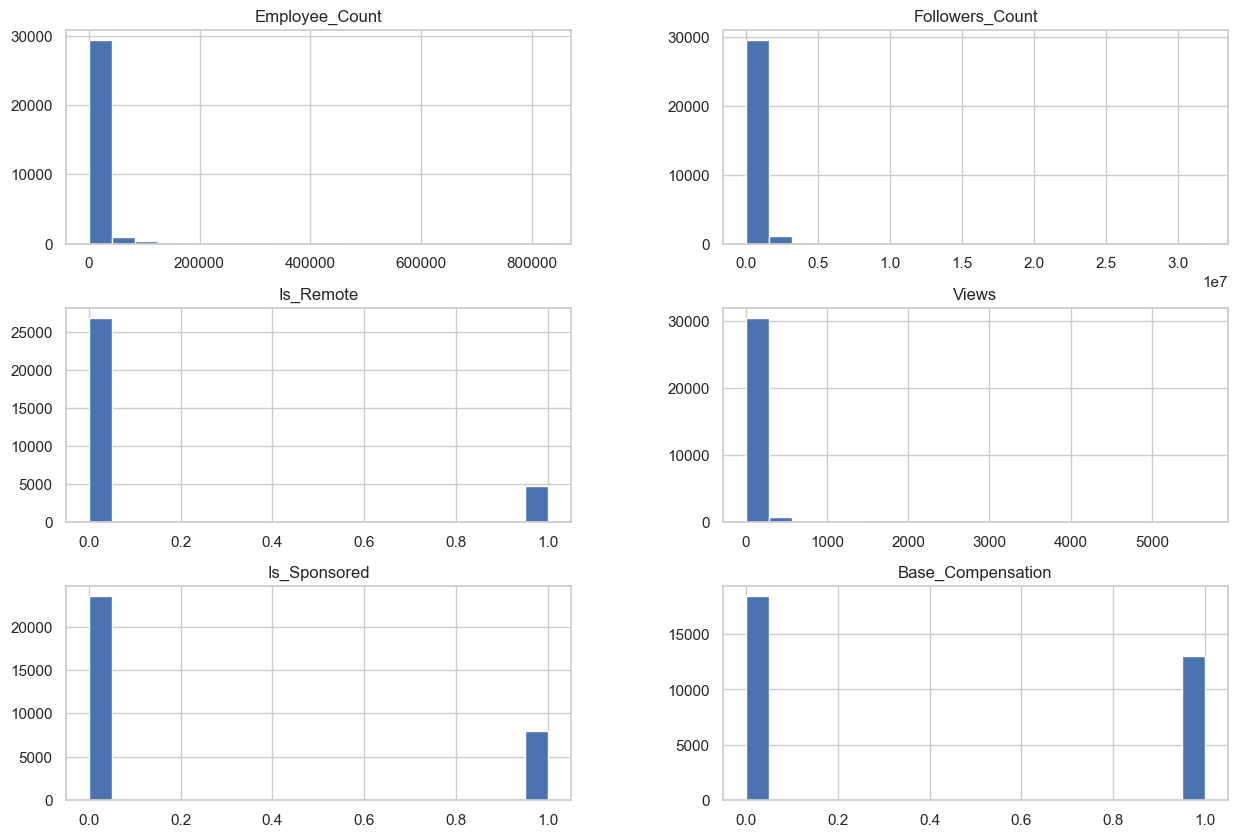

In [38]:
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

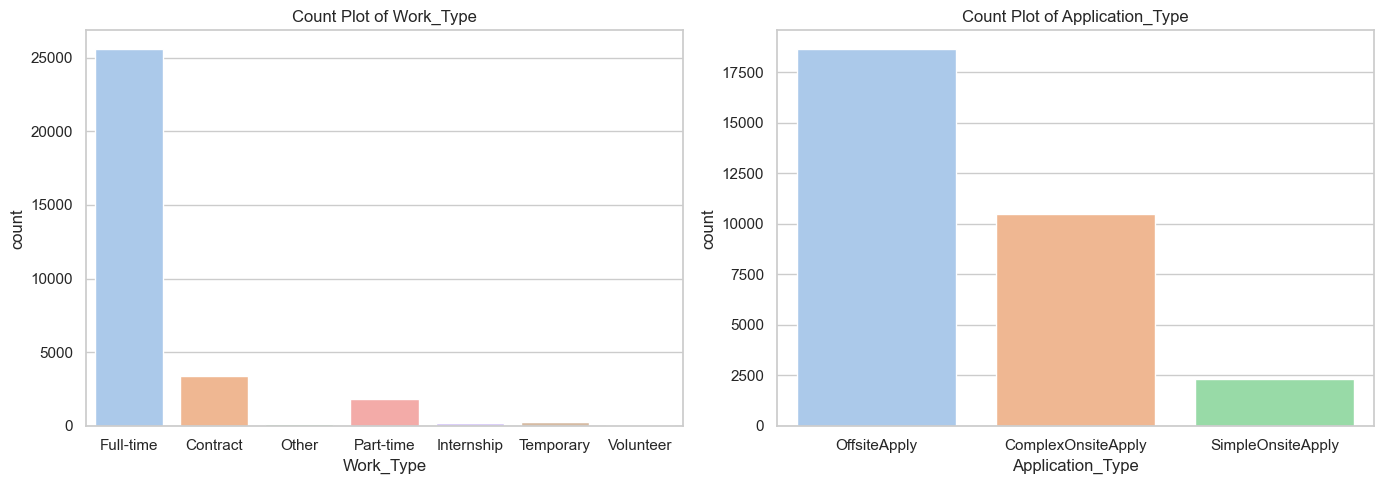

In [39]:
# Combined side-by-side count plot for categorical variables
categorical_columns = ['Work_Type','Application_Type']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

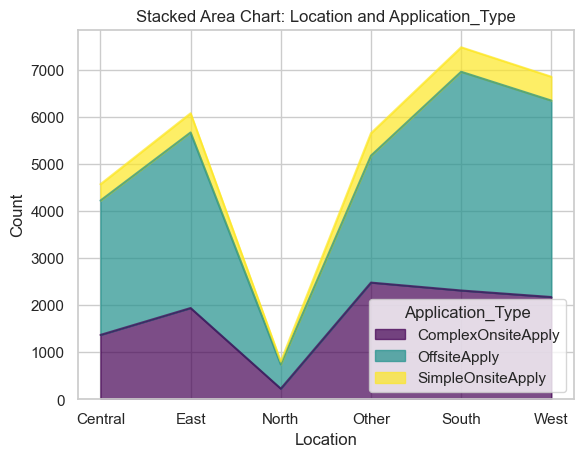

In [40]:
#Stacked Area Chart .
crosstab = pd.crosstab(df['Categorized_Location'],df['Application_Type'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Location and Application_Type')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

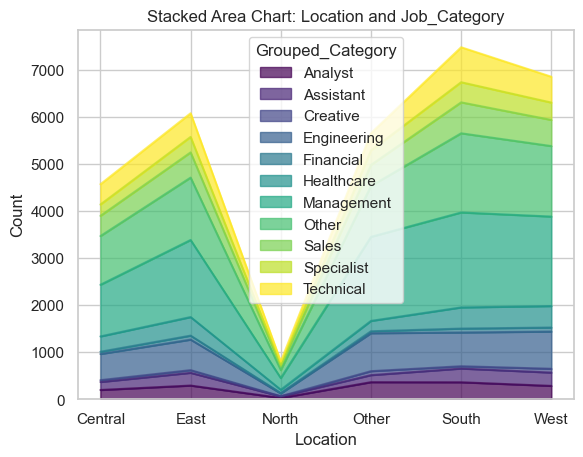

In [41]:
#Stacked Area Chart .
crosstab = pd.crosstab(df['Categorized_Location'],df['Grouped_Category'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Location and Job_Category')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

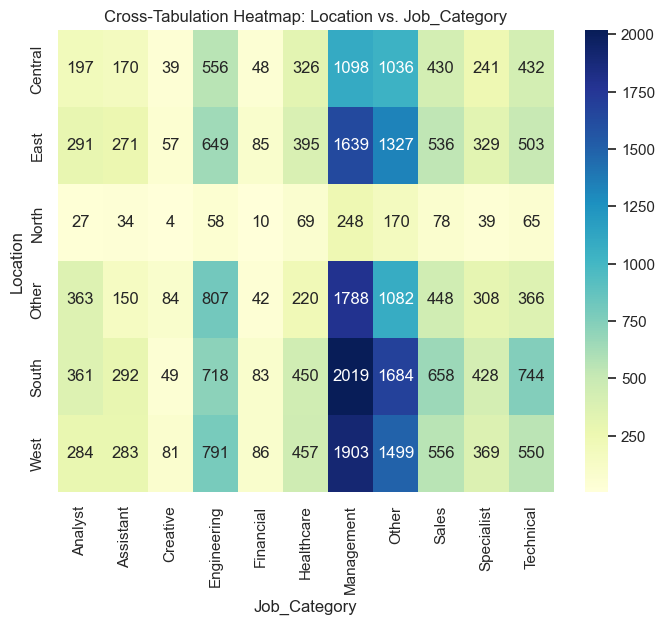

In [42]:
crosstab = pd.crosstab(df['Categorized_Location'], df['Grouped_Category'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: Location vs. Job_Category')
plt.xlabel('Job_Category')
plt.ylabel('Location')
plt.show()

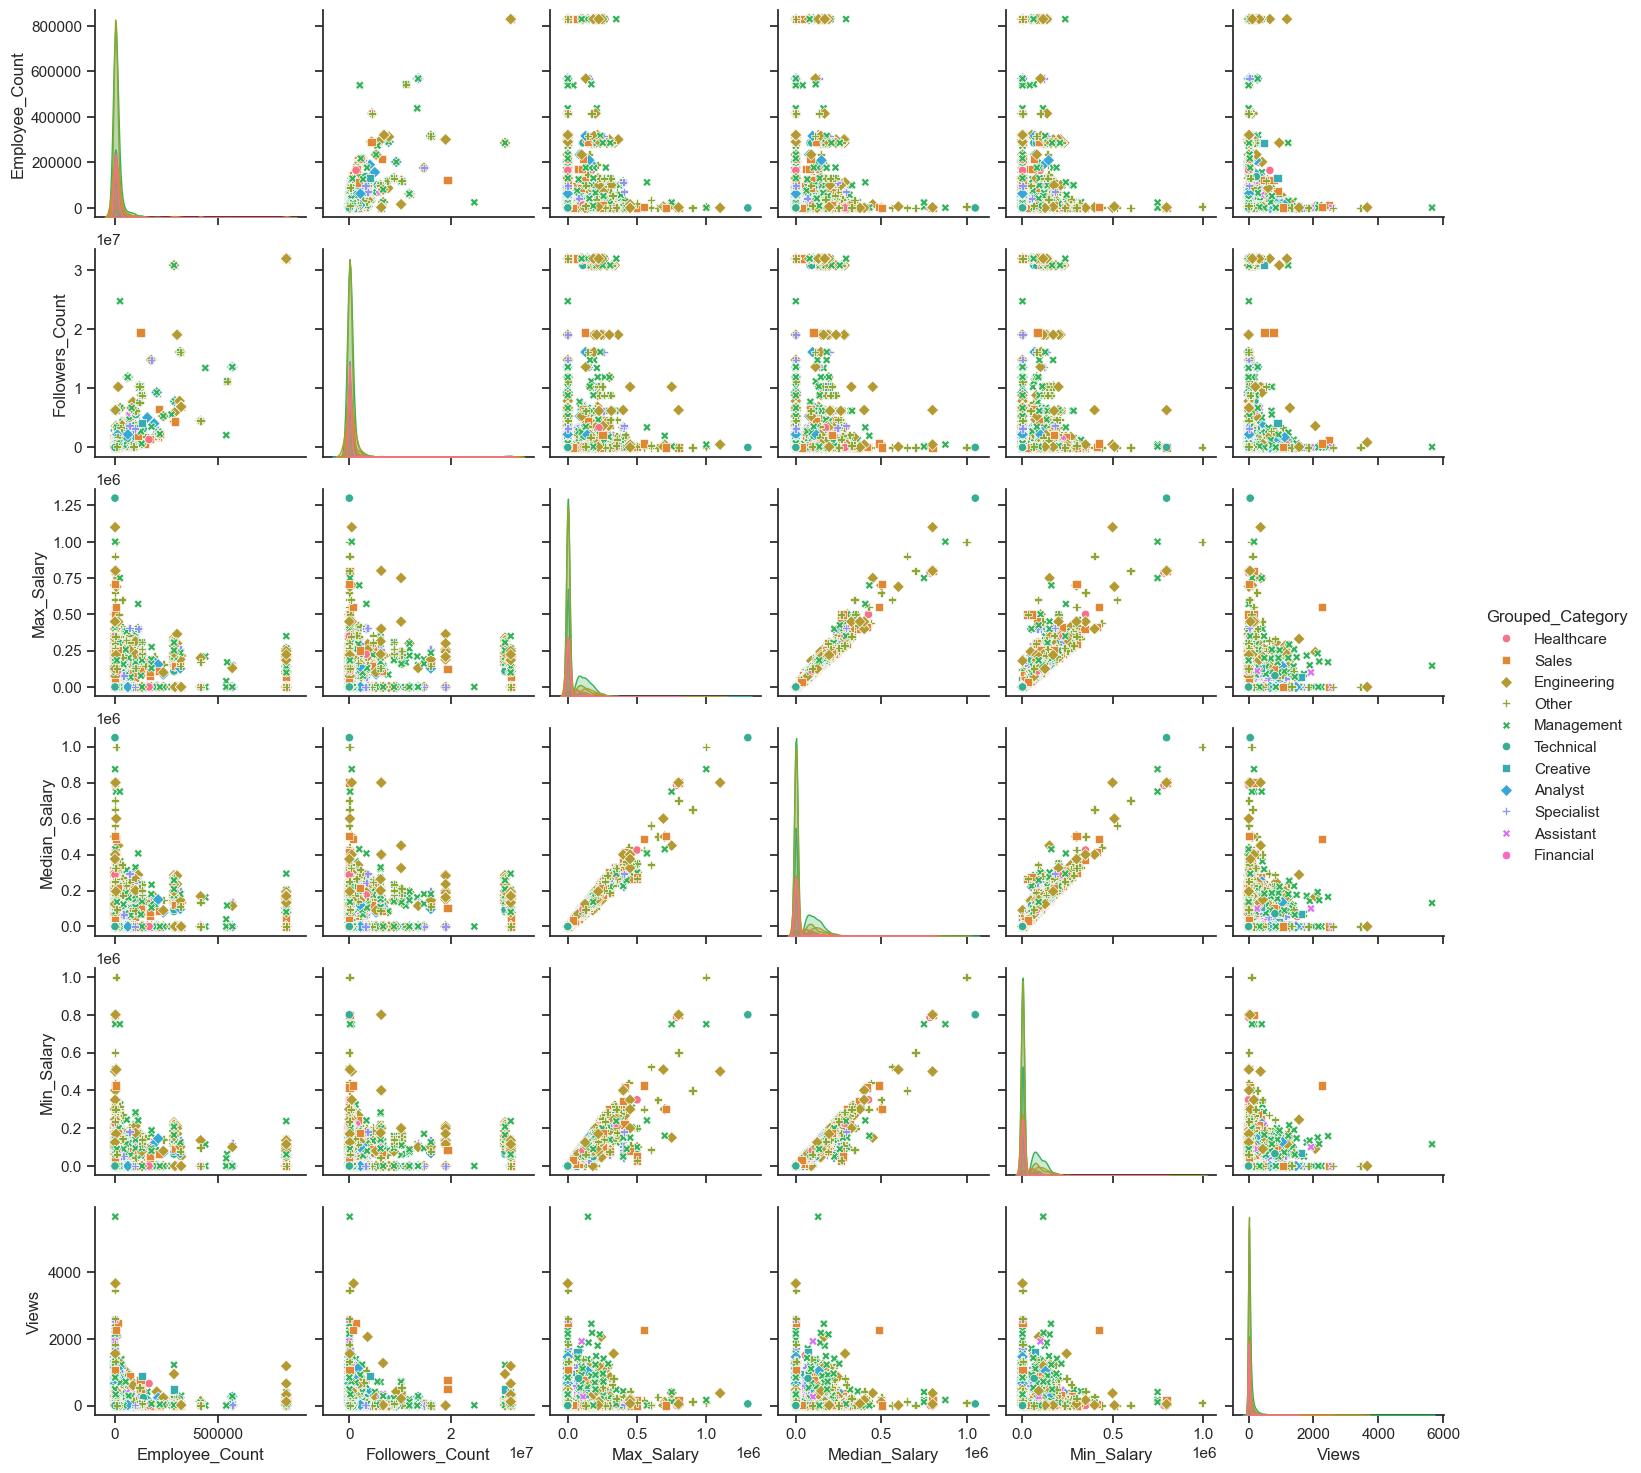

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting variables for pairplot
selected_vars = ['Employee_Count', 'Followers_Count', 'Max_Salary', 'Median_Salary', 'Min_Salary', 'Views', 'Grouped_Category', 'Categorized_Location']

# Creating a DataFrame with selected variables
pairplot_data = df[selected_vars]

# Dropping null values (if any)
pairplot_data = pairplot_data.dropna()

# Create a pairplot
sns.set(style="ticks")
sns.pairplot(pairplot_data, hue='Grouped_Category', palette='husl', markers=["o", "s", "D", "P", "X"])

# Show the plot
plt.show()


In [44]:
from sklearn.preprocessing import LabelEncoder

# Convert boolean columns to integer
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

# Encode categorical columns
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col.astype(str)))


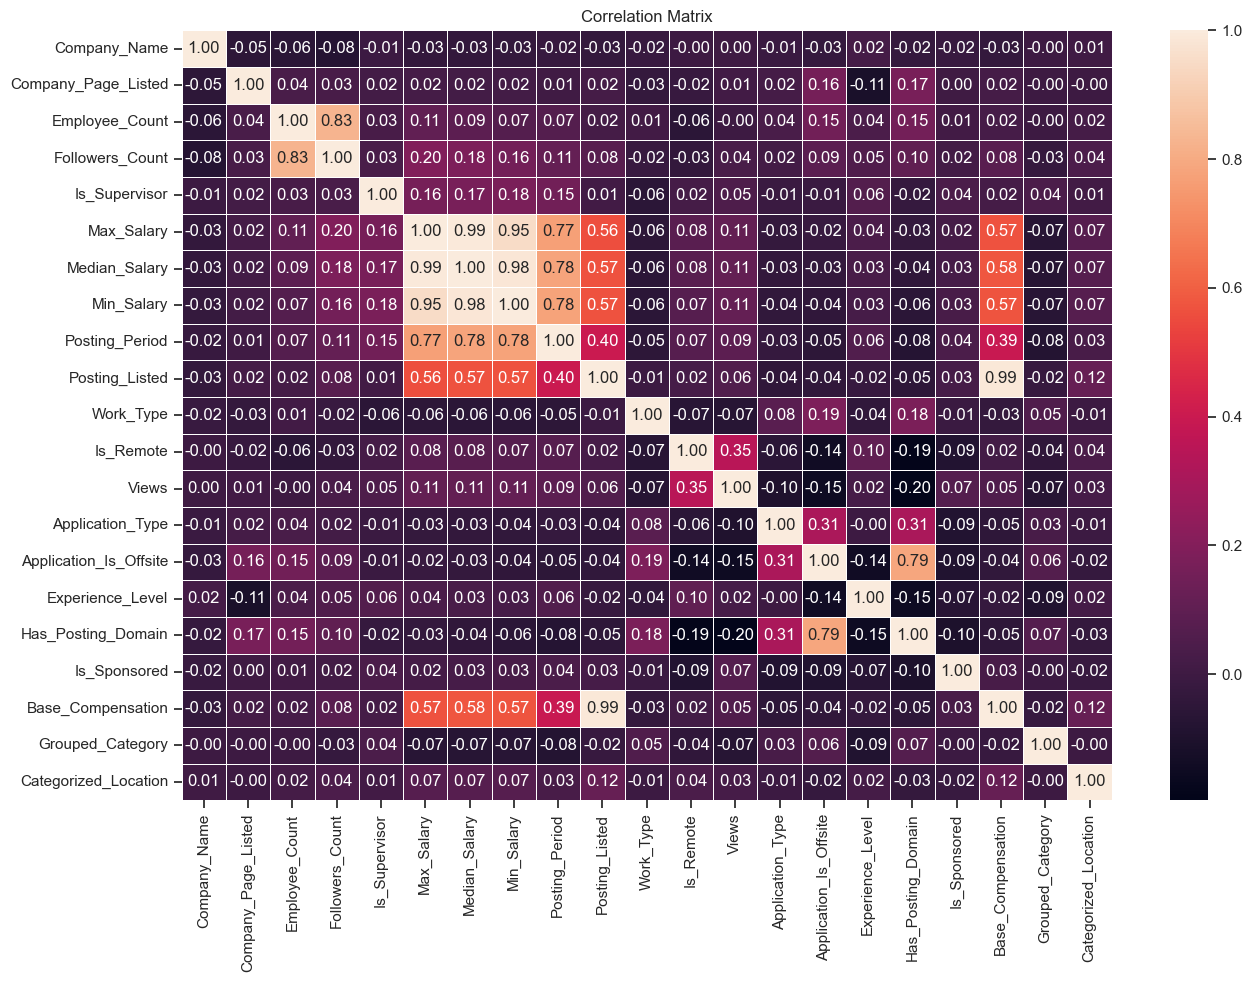

In [45]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Max_Salary and Median_Salary have a strong positive correlation of 0.99, which is expected since median and maximum salaries should generally be close.

Max_Salary and Base_Compensation have a relatively strong positive correlation of 0.57.

Posting_Period and salary-related variables (Max_Salary, Median_Salary, Min_Salary) have some positive correlation, **suggesting that salary information might be influenced by the posting period.**

Is_Remote and Application_Is_Offsite have a negative correlation of -0.14, indicating that **remote work opportunities might not always involve offsite applications.**

**Has_Posting_Domain and Application_Is_Offsite have a relatively strong positive correlation of 0.79.**

Has_Posting_Domain and Experience_Level have a negative correlation of -0.15, suggesting that **job postings with specified domains might have different experience level requirements.**

Views and Is_Remote have a positive correlation of 0.35,**indicating that remote positions might attract more views.**

Views and Has_Posting_Domain have a negative correlation of -0.20.

Views and Is_Sponsored have a positive correlation of 0.07.

# **TARGET_VARIABLE : CHECK SPONSERSHIP**

In [46]:
# Define the target variable
target_variable = 'Is_Sponsored'

# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)


Is_Sponsored              1.000000
Views                     0.067507
Is_Supervisor             0.040830
Posting_Period            0.038590
Min_Salary                0.032904
Base_Compensation         0.030727
Posting_Listed            0.026193
Median_Salary             0.025638
Max_Salary                0.019885
Followers_Count           0.017316
Employee_Count            0.012564
Company_Page_Listed       0.002716
Grouped_Category         -0.004522
Work_Type                -0.013330
Company_Name             -0.015054
Categorized_Location     -0.015736
Experience_Level         -0.066427
Application_Type         -0.086128
Is_Remote                -0.088057
Application_Is_Offsite   -0.089033
Has_Posting_Domain       -0.104598
Name: Is_Sponsored, dtype: float64


**Moderate Correlation (Absolute Value > 0.05):**

Views (0.067507)
Is_Supervisor (0.040830)
Posting_Period (0.038590)
Min_Salary (0.032904)
Base_Compensation (0.030727)
Posting_Listed (0.026193)
Median_Salary (0.025638)
Max_Salary (0.019885)
Followers_Count (0.017316)
Employee_Count (0.012564)

**Low Correlation (Absolute Value < 0.05):**
Company_Page_Listed (0.002716)
Grouped_Category (-0.004522)
Work_Type (-0.013330)
Company_Name (-0.015054)
Categorized_Location (-0.015736)
Experience_Level (-0.066427)
Application_Type (-0.086128)
Is_Remote (-0.088057)
Application_Is_Offsite (-0.089033)
Has_Posting_Domain (-0.104598)

In [47]:
# List of columns to drop
columns_to_drop = [
    'Company_Page_Listed',
    'Grouped_Category',
    'Work_Type',
    'Company_Name',
    'Categorized_Location',
    'Experience_Level',
    'Application_Type',
    'Is_Remote',
    'Application_Is_Offsite',
    'Has_Posting_Domain'
]

# Create the new DataFrame df_train by dropping specified columns
df_train = df.drop(columns=columns_to_drop)

# Display the updated DataFrame info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31460 entries, 0 to 33243
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Count     31460 non-null  int64  
 1   Followers_Count    31460 non-null  int64  
 2   Is_Supervisor      31460 non-null  int32  
 3   Max_Salary         31460 non-null  float64
 4   Median_Salary      31460 non-null  float64
 5   Min_Salary         31460 non-null  float64
 6   Posting_Period     31460 non-null  int32  
 7   Posting_Listed     31460 non-null  int32  
 8   Views              31460 non-null  int64  
 9   Is_Sponsored       31460 non-null  int64  
 10  Base_Compensation  31460 non-null  int64  
dtypes: float64(3), int32(3), int64(5)
memory usage: 2.5 MB


# **MODEL FITTING AND PREDICTION**

In [48]:
# Split the data into training and testing sets
X = df_train.drop('Is_Sponsored', axis=1)
y = df_train['Is_Sponsored']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25168, 10)
X_test shape: (6292, 10)
y_train shape: (25168,)
y_test shape: (6292,)


# **Check Class Imbalance**

In [49]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Check class distribution
class_distribution = y_train.value_counts()
print("Class Distribution:")
print(class_distribution)

# Check the imbalance ratio (ratio of the majority class to the minority class)
imbalance_ratio = class_distribution[0] / class_distribution[1]
print("Imbalance Ratio:", imbalance_ratio)

# If the imbalance ratio is greater than a threshold (e.g., 2), apply SMOTE
threshold = 2
if imbalance_ratio > threshold:
    # Initialize SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Fit and apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Check the class distribution after SMOTE
    resampled_class_distribution = y_train_resampled.value_counts()
    print("\nClass Distribution After SMOTE:")
    print(resampled_class_distribution)

    # Update the training data with the resampled data
    X_train = X_train_resampled
    y_train = y_train_resampled
    print("\nSMOTE Applied. Training data resampled.")
else:
    print("\nNo significant class imbalance. SMOTE not applied.")

# Now, the X_train and y_train data are resampled if a significant imbalance was detected.

Class Distribution:
Is_Sponsored
0    18828
1     6340
Name: count, dtype: int64
Imbalance Ratio: 2.9697160883280755

Class Distribution After SMOTE:
Is_Sponsored
0    18828
1    18828
Name: count, dtype: int64

SMOTE Applied. Training data resampled.


# **Remove outliers from training data with IQR**

In [50]:
# Define the columns to remove outliers
selected_columns = ['Employee_Count','Followers_Count','Is_Supervisor','Max_Salary','Median_Salary','Min_Salary','Views',
                   'Posting_Period','Posting_Listed','Base_Compensation']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")

Number of rows removed due to outliers: 12881


# **Linear Regression**

In [51]:
from sklearn.metrics import *

In [52]:
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")

Linear Regression Mean Squared Error: 0.53
Linear Regression Mean Absolute Error: 0.56


# **Logistic Regression**

In [53]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.60
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71      4714
           1       0.31      0.47      0.37      1578

    accuracy                           0.60      6292
   macro avg       0.55      0.56      0.54      6292
weighted avg       0.67      0.60      0.62      6292



# **KNN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import *
from sklearn.model_selection import GridSearchCV

In [55]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Model Accuracy: 0.6074380165289256
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72      4714
           1       0.30      0.43      0.35      1578

    accuracy                           0.61      6292
   macro avg       0.54      0.55      0.54      6292
weighted avg       0.66      0.61      0.63      6292



# **Decision Tree Classifier**

In [56]:
# Best Parameters for Decision Tree Classifier
best_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

dt_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.6171328671328671
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.73      4714
           1       0.31      0.43      0.36      1578

    accuracy                           0.62      6292
   macro avg       0.55      0.55      0.54      6292
weighted avg       0.66      0.62      0.63      6292



# **Random Forest Classifier**

In [57]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.6451048951048951
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.72      0.75      4714
           1       0.33      0.42      0.37      1578

    accuracy                           0.65      6292
   macro avg       0.56      0.57      0.56      6292
weighted avg       0.67      0.65      0.66      6292



# **Gradient Bossting Classifier**

In [58]:
# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42, verbose=0, learning_rate=0.1,subsample=0.8)

gb_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Gradient Boosting Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Gradient Boosting Model Accuracy: 0.6431977113795295
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      4714
           1       0.34      0.46      0.39      1578

    accuracy                           0.64      6292
   macro avg       0.57      0.58      0.57      6292
weighted avg       0.68      0.64      0.66      6292



# **AUC REPORT**

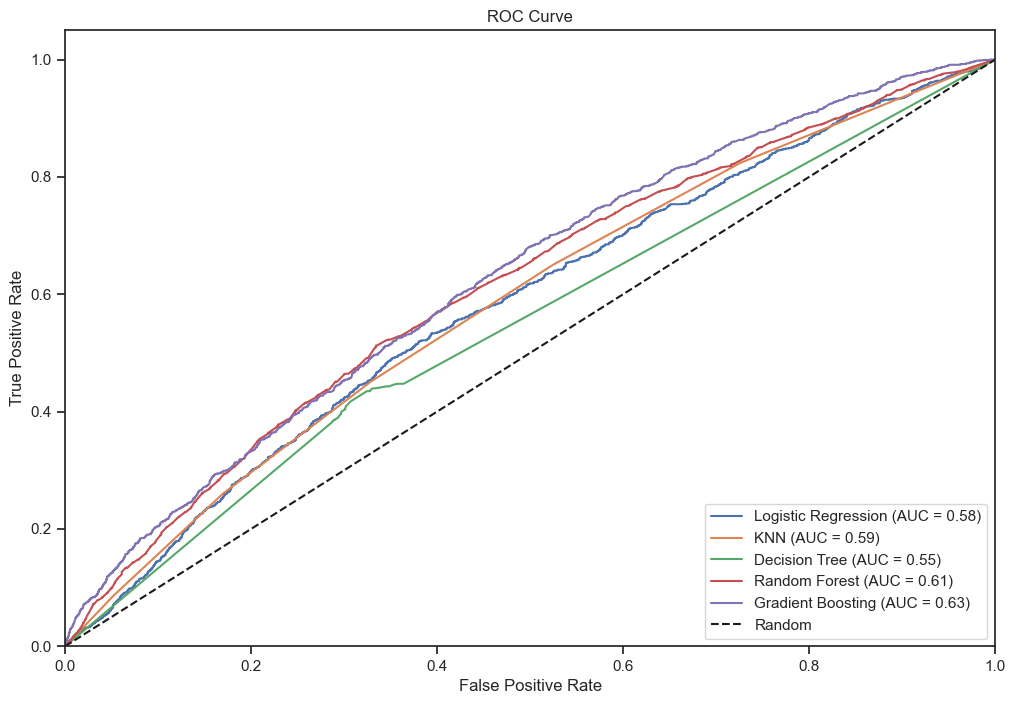

In [59]:
# Define classifiers
logistic_model = LogisticRegression()
knn_classifier = KNeighborsClassifier()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

# Fit classifiers
logistic_model.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)  # Fit the KNN classifier
dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)

# Define a list of classifiers and their names excluding others
classifiers = [logistic_model, knn_classifier, dt_classifier, rf_classifier, gb_classifier]
classifier_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "Gradient Boosting"]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):  # Check if the classifier has predict_proba method
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")  # Fixed the missing parenthesis

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for classifiers
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)


# **PERFORMANCE SUMMARY 1:**



Among the models predicting sponsorship, the **Random Forest Classifier demonstrates the highest accuracy (66.43%)** and provides a balanced performance with precision, recall, and F1-score. **The Decision Tree Classifier follows closely with an accuracy of 62.67%.** **The AUC scores** further validate the **Random Forest's superiority**, showcasing **a value of 0.62**, indicating good discriminatory power. In summary, the Random Forest Classifier stands out as the top choice for predicting sponsorship, offering a robust balance between precision and recall.

# **Target Variable: Salary**

In [60]:
# Define the target variable
target_variable = 'Median_Salary'

# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)

Median_Salary             1.000000
Max_Salary                0.991720
Min_Salary                0.984059
Posting_Period            0.781029
Base_Compensation         0.576854
Posting_Listed            0.569247
Followers_Count           0.182675
Is_Supervisor             0.170586
Views                     0.111745
Employee_Count            0.092918
Is_Remote                 0.079616
Categorized_Location      0.074583
Experience_Level          0.034869
Is_Sponsored              0.025638
Company_Page_Listed       0.018959
Application_Is_Offsite   -0.028173
Company_Name             -0.032512
Application_Type         -0.033510
Has_Posting_Domain       -0.041706
Work_Type                -0.056542
Grouped_Category         -0.070175
Name: Median_Salary, dtype: float64


In [61]:
# Drop columns related to Max_Salary and Min_Salary
df.drop(['Max_Salary', 'Min_Salary'], axis=1, inplace=True)

# Define the target variable
target_variable = 'Median_Salary'

# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)


Median_Salary             1.000000
Posting_Period            0.781029
Base_Compensation         0.576854
Posting_Listed            0.569247
Followers_Count           0.182675
Is_Supervisor             0.170586
Views                     0.111745
Employee_Count            0.092918
Is_Remote                 0.079616
Categorized_Location      0.074583
Experience_Level          0.034869
Is_Sponsored              0.025638
Company_Page_Listed       0.018959
Application_Is_Offsite   -0.028173
Company_Name             -0.032512
Application_Type         -0.033510
Has_Posting_Domain       -0.041706
Work_Type                -0.056542
Grouped_Category         -0.070175
Name: Median_Salary, dtype: float64


In [62]:
# Selecting important columns
selected_columns = [
    'Median_Salary',
    'Posting_Period',
    'Base_Compensation',
    'Posting_Listed',
    'Followers_Count',
    'Is_Supervisor',
    'Views',
    'Employee_Count',
    'Is_Remote',
    'Categorized_Location',
    'Experience_Level',
    'Is_Sponsored',
    'Company_Page_Listed'
    
]

# Create a new dataframe with the selected columns
df_salary = df[selected_columns]


In [63]:
df_salary.head()

,Median_Salary,Posting_Period,Base_Compensation,Posting_Listed,Followers_Count,Is_Supervisor,Views,Employee_Count,Is_Remote,Categorized_Location,Experience_Level,Is_Sponsored,Company_Page_Listed
0,5250.00,1,1,1,11417,0,9,1171,0,4,2,0,1
1,0.00,2,0,0,2923,0,0,300,0,0,6,0,1
2,0.00,2,0,0,8487,1,0,314,0,4,6,0,1
3,22.27,0,1,1,305,0,1,36,0,5,2,0,1
4,240895.00,6,1,1,51933,0,0,1227,1,3,5,0,1


# **Linear Regression**

**ALL THE OTHER MODELS FOLLOWING THIS ARE PREDICTING WITH ACCURAY OF 1, Models include: Random forest, xgboost, lgbm, catboost, gradient boost.
Therefore lets perfrom regression testing instead of binary salary classification**

# **TARGET VARIABLE: SALARY (REGRESSION TESTING)**

In [64]:
df_salary.shape

(31460, 13)

In [65]:
from scipy import stats
# Calculate Z-scores for each column
z_scores = stats.zscore(df_salary)

# Define a threshold for Z-scores (here: 3 standard deviations)
threshold = 3
outliers = (abs(z_scores) > threshold).all(axis=1)

# Remove outliers from the dataset
df_no_outliers = df[~outliers]

# Verify the shape of the new dataset
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

Original shape: (31460, 19)
Shape after removing outliers: (31460, 19)


In [66]:
df_no_outliers

,Company_Name,Company_Page_Listed,Employee_Count,Followers_Count,Is_Supervisor,Median_Salary,Posting_Period,Posting_Listed,Work_Type,Is_Remote,Views,Application_Type,Application_Is_Offsite,Experience_Level,Has_Posting_Domain,Is_Sponsored,Base_Compensation,Grouped_Category,Categorized_Location
0,4438,1,1171,11417,0,5250.00,1,1,1,0,9,1,1,2,1,0,1,5,4
1,6249,1,300,2923,0,0.00,2,0,1,0,0,1,1,6,1,0,0,8,0
2,10169,1,314,8487,1,0.00,2,0,1,0,0,1,1,6,1,0,0,3,4
3,3312,1,36,305,0,22.27,0,1,1,0,1,1,1,2,1,0,1,7,5
4,11188,1,1227,51933,0,240895.00,6,1,1,1,0,1,1,5,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,6657,1,27,3159,0,0.00,2,0,1,0,10,1,1,2,1,0,0,6,4
33240,588,1,2838,18507,0,0.00,2,0,1,0,0,1,1,5,1,0,0,7,5
33241,2580,1,9109,134126,1,136564.00,6,1,1,0,2,1,1,6,1,0,1,6,1
33242,676,1,170,6051,0,0.00,2,0,1,0,0,1,1,5,1,1,0,10,4


# K-Means Clustering Example:


In [67]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

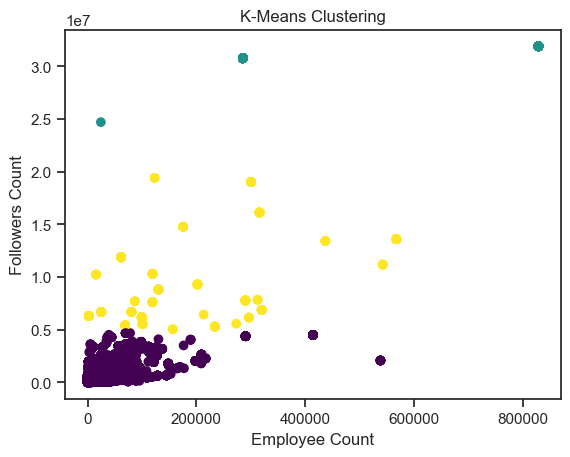

,Company_Name,Company_Page_Listed,Employee_Count,Followers_Count,Is_Supervisor,Median_Salary,Posting_Period,Posting_Listed,Work_Type,Is_Remote,Views,Application_Type,Application_Is_Offsite,Experience_Level,Has_Posting_Domain,Is_Sponsored,Base_Compensation,Grouped_Category,Categorized_Location
Cluster,,,,,,,,,,,,,,,,,,,
0,5607.162498,0.977991,9631.118383,2.361343e+05,0.309902,27075.896608,2.672904,0.415972,1.122455,0.148924,47.424245,0.739254,0.585418,3.941277,0.569259,0.251277,0.409411,5.952912,2.816075
1,2386.904762,1.000000,548420.680952,3.127972e+07,0.457143,136577.329905,5.133333,0.804762,1.000000,0.014286,98.876190,0.814286,0.995238,5.333333,0.995238,0.395238,0.804762,5.352381,3.700000
2,5048.970779,1.000000,187179.253247,9.323249e+06,0.402597,76597.384302,3.435065,0.548701,1.113636,0.162338,65.665584,0.769481,0.714286,4.396104,0.766234,0.194805,0.548701,5.444805,3.204545


In [68]:
features = df_no_outliers[['Employee_Count', 'Followers_Count', 'Median_Salary']]

# Scale features if needed
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# Initialize and fit K-Means model
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the original data
df_no_outliers['Cluster'] = clusters

# Visualize clusters (example with 2D scatter plot)
plt.scatter(df_no_outliers['Employee_Count'], df_no_outliers['Followers_Count'], c=clusters, cmap='viridis')
plt.xlabel('Employee Count')
plt.ylabel('Followers Count')
plt.title('K-Means Clustering')
plt.show()

# Explore cluster characteristics
cluster_means = df_no_outliers.groupby('Cluster').mean()
cluster_means

In [73]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 1.472761902613822e+16


In [74]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9469360760943702


# Principal Component Analysis (PCA) Example:

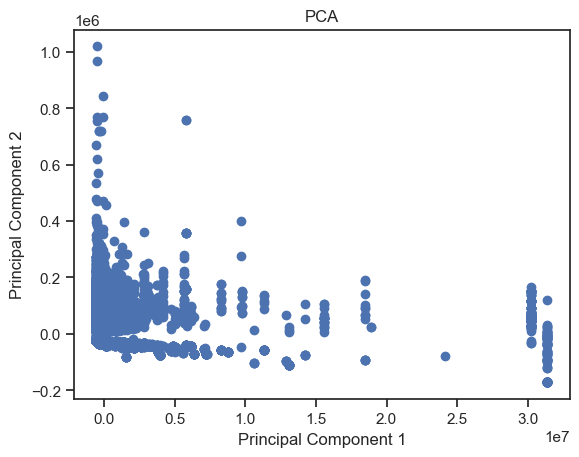

Explained Variance Ratio: [9.99414142e-01 4.35420832e-04]


In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant features for PCA
features = df_no_outliers.drop(['Company_Name', 'Cluster'], axis=1)  # Remove non-numeric and cluster labels

# Initialize and fit PCA model
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize PCA results (example with 2D scatter plot)
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

# Explore explained variance ratio to understand component importance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

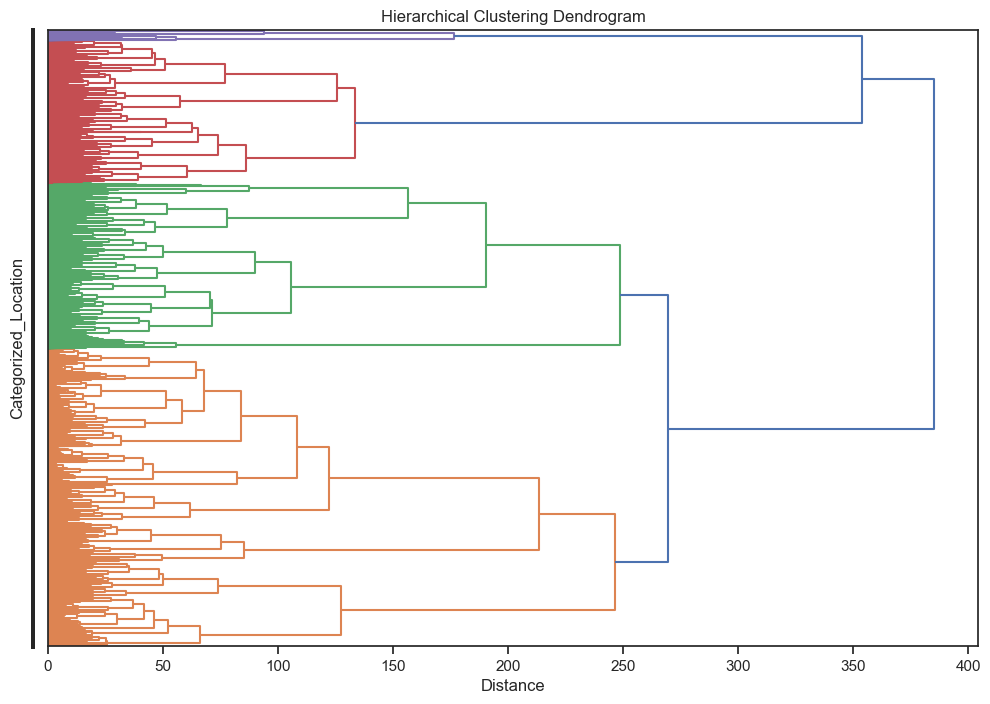

In [75]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_no_outliers.drop(columns=['Categorized_Location']))

# Perform hierarchical clustering
Z = hierarchy.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dn = hierarchy.dendrogram(Z, labels=df_no_outliers['Categorized_Location'].values, orientation='right')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Categorized_Location')
plt.show()

In [76]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5527810325102973
